* load packages

In [48]:
from RES.hdf5_handler import DataHandler
import RES.visuals as vis
import pandas as pd
import geopandas as gpd
import warnings
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Define Province Code

In [49]:
province_code:str='AB' # The tool is designed to work for any province of CANADA.
store=f"../data/store/resources_{province_code}.h5" 
res_data=DataHandler(store,
                     show_structure=True) # the DataHandler object could be initiated without the store definition as well.

____________________________________________________________
     Structure of HDF5 file: ../data/store/resources_AB.h5
____________________________________________________________
[key] boundary
[key] cells
[key] clusters
  └─ [key] clusters/solar
  └─ [key] clusters/wind
[key] cost
  └─ [key] cost/atb
  └─   └─ [key] cost/atb/bess
  └─   └─ [key] cost/atb/solar
  └─   └─ [key] cost/atb/wind
[key] dissolved_indices
  └─ [key] dissolved_indices/solar
  └─ [key] dissolved_indices/wind
[key] substations
[key] timeseries
  └─ [key] timeseries/clusters
  └─   └─ [key] timeseries/clusters/solar
  └─   └─ [key] timeseries/clusters/wind
  └─ [key] timeseries/solar
  └─ [key] timeseries/wind
[key] units


└> To access the data : 
 └> <datahandler instance>.from_store('<key>')


# Load Data from Store

In [50]:
# Loading Geodataframes
cells=res_data.from_store('cells')
boundary=res_data.from_store('boundary')
timeseries_clusters_solar=res_data.from_store('timeseries/clusters/solar')
timeseries_clusters_wind=res_data.from_store('timeseries/clusters/wind')
clusters_solar=res_data.from_store('clusters/solar')
clusters_wind=res_data.from_store('clusters/wind')

└> CF vs LCOE plot for solar resources created and saved to : vis/Resources_CF_vs_LCOE_solar.png
└> CF vs LCOE plot for wind resources created and saved to : vis/Resources_CF_vs_LCOE_wind.png


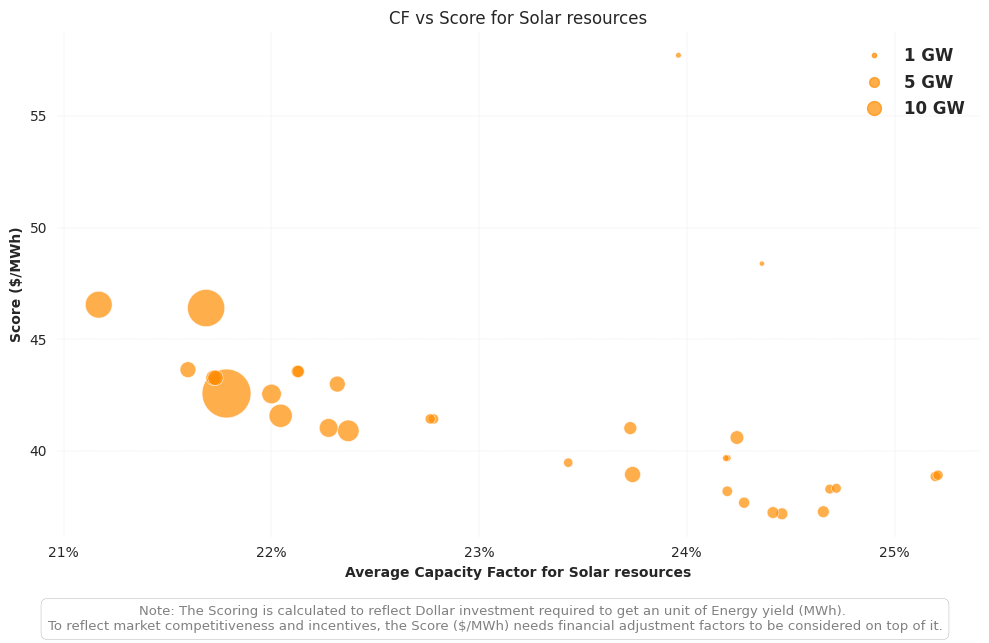

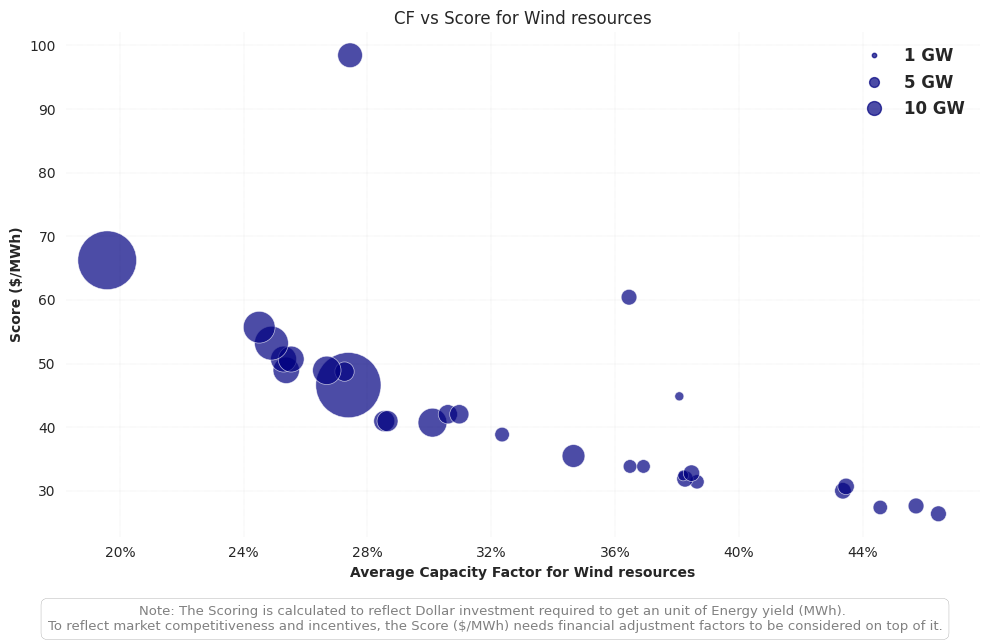

In [65]:
vis.plot_resources_scatter_metric('solar',
                              clusters_solar)
vis.plot_resources_scatter_metric('wind',
                              clusters_wind,100)

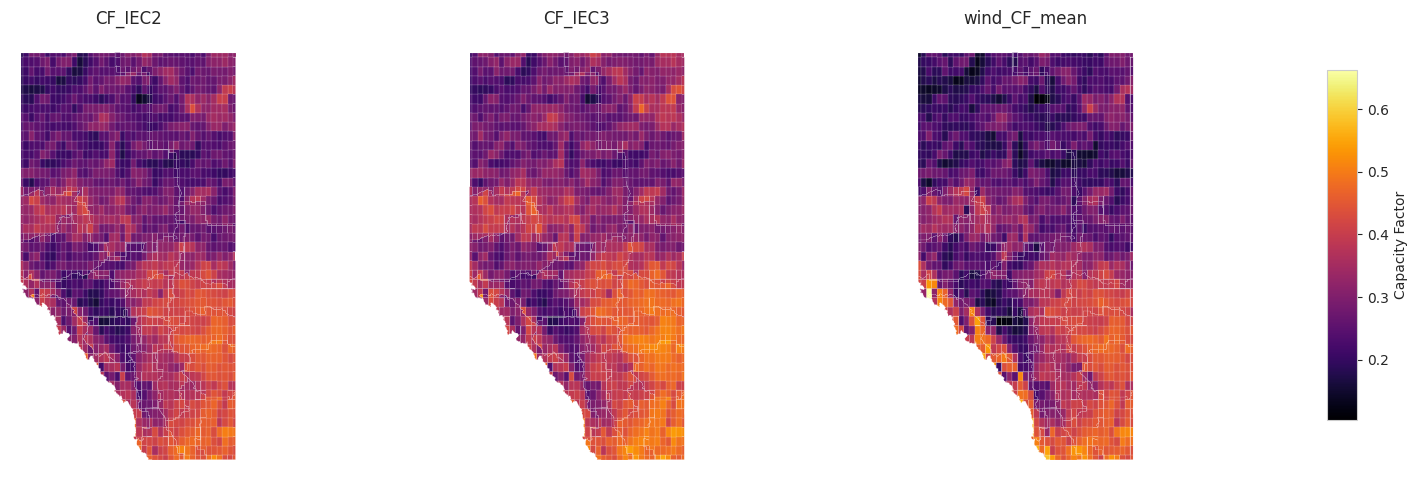

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Example data setup (replace with your actual data)
# Assuming 'cells' is a GeoDataFrame with columns 'CF_IEC2', 'CF_IEC3', 'wind_CF_mean'
# and a geometry column for plotting.

# Determine the common color scale across all columns
vmin = min(cells[['CF_IEC2', 'CF_IEC3', 'wind_CF_mean']].min())
vmax = max(cells[['CF_IEC2', 'CF_IEC3', 'wind_CF_mean']].max())

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# List of columns to plot
columns_to_plot = ['CF_IEC2', 'CF_IEC3', 'wind_CF_mean']

# Plot each column
for ax, column in zip(axes, columns_to_plot):
    im = cells.plot(column=column, ax=ax, legend=False, edgecolor=None, linewidth=0.1,
                    cmap='inferno', vmin=vmin, vmax=vmax)
    ax.set_title(column)
    ax.axis('off')  # Hide axis for cleaner look

# Add a single colorbar
fig.subplots_adjust(right=0.9)  # Adjust space to accommodate colorbar
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])  # Position for colorbar
sm = plt.cm.ScalarMappable(cmap='inferno', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # Dummy array for the scalar mappable
fig.colorbar(sm, cax=cbar_ax, label='Capacity Factor')

plt.tight_layout()
plt.savefig('wind_CF_comparison_mean.png', dpi=600)
plt.show()


In [53]:
gwa_cols = ['CF_IEC2', 'CF_IEC3', 'wind_CF_mean']
print(cells[gwa_cols].isnull().sum())
print(cells[gwa_cols].describe())

CF_IEC2         0
CF_IEC3         0
wind_CF_mean    0
dtype: int64
           CF_IEC2      CF_IEC3  wind_CF_mean
count  1978.000000  1978.000000   1978.000000
mean      0.315653     0.347496      0.304781
std       0.080655     0.083337      0.097444
min       0.135289     0.154394      0.103912
25%       0.250985     0.281109      0.224085
50%       0.302904     0.334983      0.286444
75%       0.380841     0.415070      0.384248
max       0.530444     0.557269      0.662341


In [54]:
# import numpy as np

# # Calculate the mean of the high-resolution CF data (CF_IEC2, CF_IEC3)
# mean_cf_iec = cells[['CF_IEC2', 'CF_IEC3']].mean(axis=1)

# # Calculate the mean of the low-resolution wind CF data (wind_CF_mean)
# mean_wind_cf = cells['wind_CF_mean']

# # Compute the scaling factor: mean of high-res CF values divided by the low-res CF value
# # You could also use a weighted mean or median if desired.
# scaling_factor = mean_cf_iec / mean_wind_cf

# # Apply the scaling factor to rescale wind_CF_mean
# cells['adjusted_wind_CF_mean'] = cells['wind_CF_mean'] * scaling_factor

# # Check the rescaled values
# print(cells[['wind_CF_mean', 'adjusted_wind_CF_mean']].describe())


In [55]:
# # Z-score normalization for wind_CF_mean, CF_IEC2, and CF_IEC3
# cells['wind_CF_mean_zscore'] = (cells['wind_CF_mean'] - cells['wind_CF_mean'].mean()) / cells['wind_CF_mean'].std()
# cells['CF_IEC2_zscore'] = (cells['CF_IEC2'] - cells['CF_IEC2'].mean()) / cells['CF_IEC2'].std()
# cells['CF_IEC3_zscore'] = (cells['CF_IEC3'] - cells['CF_IEC3'].mean()) / cells['CF_IEC3'].std()

# # Rescale wind_CF_mean by averaging the Z-scores
# cells['rescaled_wind_CF_mean_zscore'] = (cells['CF_IEC2_zscore'] + cells['CF_IEC3_zscore']) / 2

# # Reverse the Z-score scaling
# cells['rescaled_wind_CF_mean_zscore'] = cells['rescaled_wind_CF_mean_zscore'] * cells['wind_CF_mean'].std() + cells['wind_CF_mean'].mean()

# # Check the results
# print(cells[['wind_CF_mean', 'rescaled_wind_CF_mean_zscore']].describe())


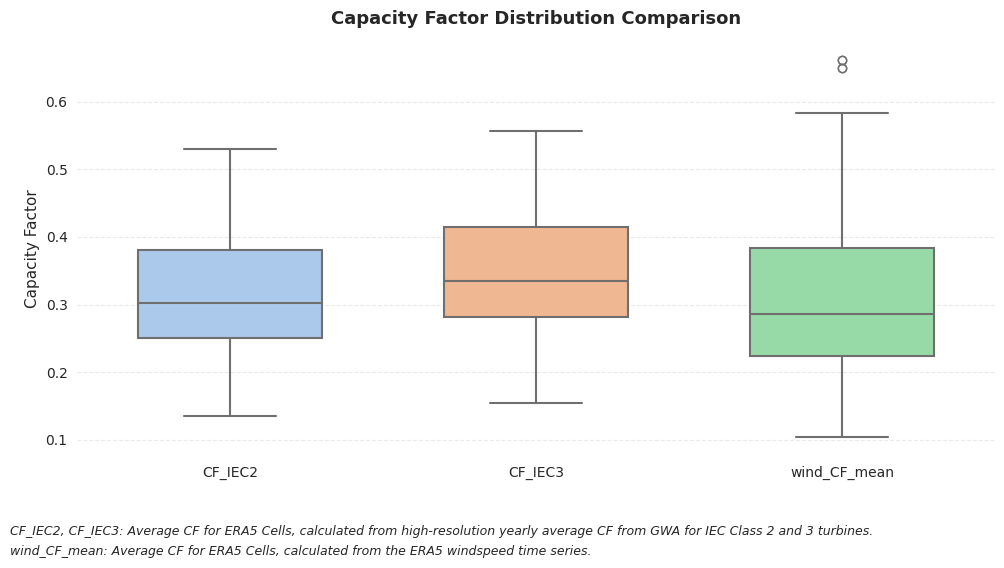

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import fill

# Set a clean and minimal style
sns.set_style("white")

# Initialize the figure
plt.figure(figsize=(10, 5))

# Create the boxplot
ax = sns.boxplot(
    data=cells[['CF_IEC2', 'CF_IEC3', 'wind_CF_mean']],
    palette="pastel",
    linewidth=1.5,
    width=0.6
)

# Set title and labels
ax.set_title('Capacity Factor Distribution Comparison', fontsize=13, weight='semibold', pad=12)
ax.set_ylabel('Capacity Factor', fontsize=11)
ax.set_xlabel('')

# Tweak tick formatting
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Add horizontal grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.4)
ax.xaxis.grid(False)

# Add footnotes below the plot
plt.figtext(
   0, -0.08, 
    fill('CF_IEC2, CF_IEC3: Average CF for ERA5 Cells, calculated from high-resolution yearly average CF from GWA for IEC Class 2 and 3 turbines.', width=140),
    horizontalalignment='left', fontsize=9, style='italic'
)

plt.figtext(
    0, -0.12, 
    fill('wind_CF_mean: Average CF for ERA5 Cells, calculated from the ERA5 windspeed time series.', width=100),
    horizontalalignment='left', fontsize=9, style='italic'
)

plt.tight_layout()
plt.show()


In [57]:
clusters_wind_f=clusters_wind[clusters_wind['potential_capacity']>0]
clusters_solar_f=clusters_solar[clusters_solar['potential_capacity']>0]

In [58]:
print(f'Total sites {len(clusters_wind_f)}')
total_capacity=clusters_wind_f.potential_capacity.sum()
print(f'Total Capacity {int(total_capacity/1E3)} GW')
sites=5
top_sites_capacity=clusters_wind_f.head(sites).potential_capacity.sum()
print(f'Top {sites} sites ({round(sites/len(clusters_wind_f)*100)}% site) capacity {int(top_sites_capacity/1E3)} GW ({round(top_sites_capacity/total_capacity*100)}% of total capacity)')

Total sites 39
Total Capacity 1063 GW
Top 5 sites (13% site) capacity 64 GW (6% of total capacity)


In [59]:
print(f'Total sites {len(clusters_solar_f)}')
total_capacity=clusters_solar_f.potential_capacity.sum()
print(f'Total Capacity {int(total_capacity/1E3)} GW')
sites=5
top_sites_capacity=clusters_solar_f.head(sites).potential_capacity.sum()
print(f'Top {sites} sites ({round(sites/len(clusters_solar_f)*100)}% site) capacity {int(top_sites_capacity/1E3)} GW ({round(top_sites_capacity/total_capacity*100)}% of total capacity)')

Total sites 39
Total Capacity 502 GW
Top 5 sites (13% site) capacity 33 GW (7% of total capacity)


# Static Plots

In [60]:
cpcad=pd.read_pickle(f'../data/downloaded_data/lands/ProtectedConservedArea_{province_code}.pickle')

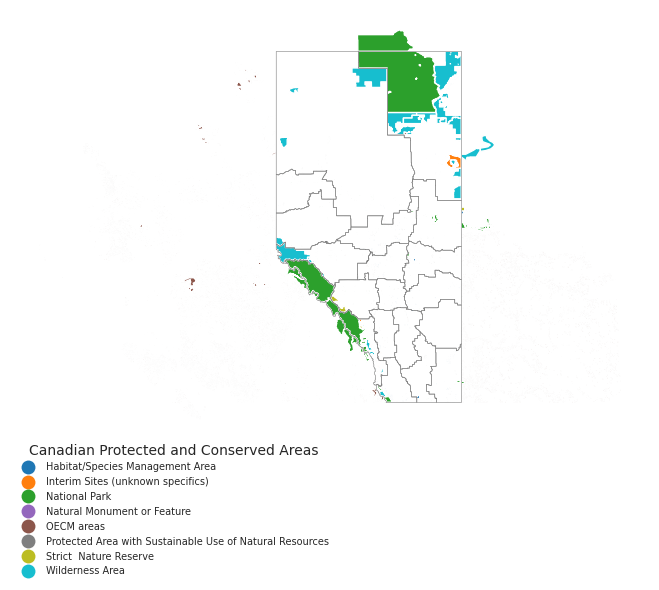

In [61]:
import matplotlib.pyplot as plt

# Shadow effect offset
shadow_offset = 0.008

fig, ax = plt.subplots(figsize=(14,6))

# Plot the cpcad_BC data
cpcad.plot('IUCN_CAT_desc', ax=ax)
cpcad.geometry = cpcad.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)
cpcad.plot('IUCN_CAT_desc', legend=True, 
              legend_kwds={'title': "Canadian Protected and Conserved Areas", 
                           'loc': 'upper left', 
                           'bbox_to_anchor': (0, 0.01), 
                           'frameon': False, 
                           'prop': {'size': 7}},  # Adjust font size (smaller values make it more compact)
              ax=ax)

# Plot solar map on ax1
# Add shadow effect 
boundary.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.3, alpha=1)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.2, alpha=0.9)  # Shadow layer

# Turn off the axis grid
ax.grid(False)
ax.axis('off')
plt.tight_layout()
plt.savefig(f'../vis/misc/CPCAD_{province_code}.png', dpi=300)

In [67]:
aeroway=gpd.read_file(f'../data/downloaded_data/OSM/{province_code}_aeroway.geojson')

/localhome/mei3/miniconda3/envs/RES/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: Several features with id = 193409261 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


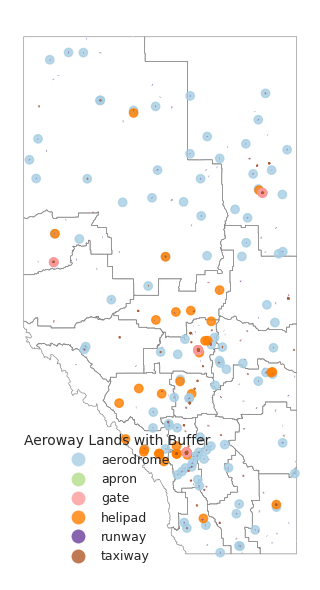

In [68]:
import matplotlib.pyplot as plt

# Shadow effect offset
shadow_offset = 0.008

fig, ax = plt.subplots(figsize=(12,6))



# Plot boundary with shadow effect
boundary.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.3, alpha=1)  # Shadow layer
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.2, alpha=0.9)  # Shadow layer
# Plot the aeroway data with more vibrant colors
aeroway.geometry = aeroway.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)
aeroway.plot('aeroway', legend=True, 
              legend_kwds={'title': "Aeroway Lands with Buffer", 
                           'loc': 'lower left', 
                           'bbox_to_anchor': (.01, 0.01), 
                           'frameon': False, 
                           'prop': {'size': 9}},  # Adjust font size (smaller values make it more compact)
              ax=ax,
              alpha=0.8,
              cmap='Paired')  # Use a vibrant colormap
# Turn off the axis grid
ax.grid(False)
ax.axis('off')
plt.tight_layout()
plt.savefig(f'../vis/misc/Aeroway_{province_code}.png', dpi=300)


In [72]:
timeseries_clusters_solar.iloc[:, 0]

time
2023-01-01 14:00:00    0.0
2023-01-01 15:00:00    0.0
2023-01-01 16:00:00    0.0
2023-01-01 17:00:00    0.0
2023-01-01 18:00:00    0.0
                      ... 
2024-01-01 09:00:00    0.0
2024-01-01 10:00:00    0.0
2024-01-01 11:00:00    0.0
2024-01-01 12:00:00    0.0
2024-01-01 13:00:00    0.0
Name: DivisionNo.6_1, Length: 8760, dtype: float64

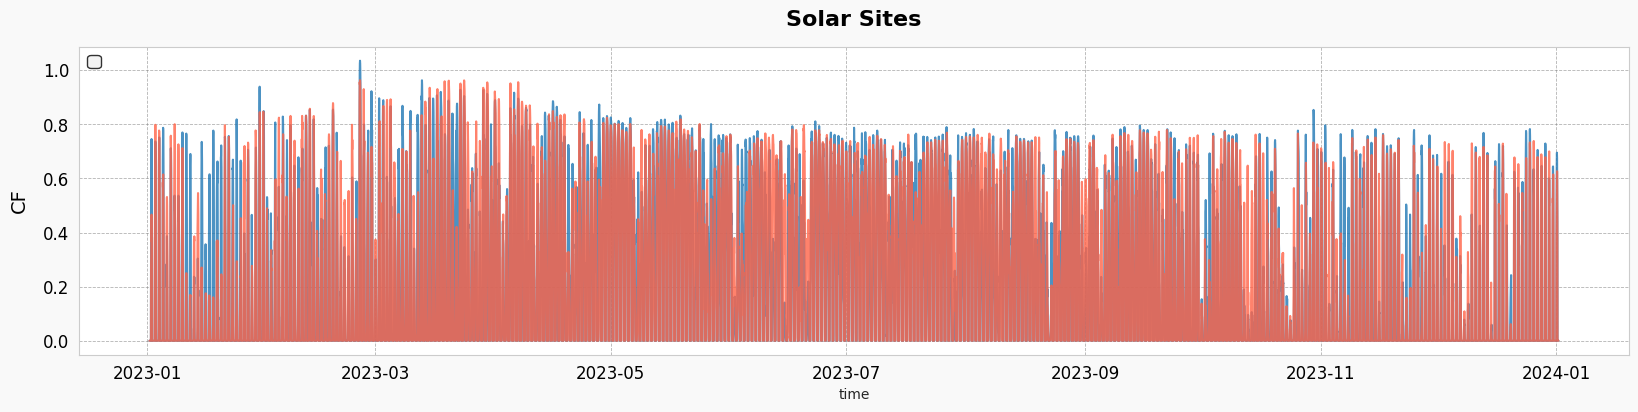

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")  

# Create figure
fig, ax = plt.subplots(figsize=(20, 4), facecolor="#f9f9f9")  # Light background

# Define custom colors
colors = ['#1f77b4', '#ff6347']

# Plot using Seaborn
sns.lineplot(data=timeseries_clusters_solar, x=timeseries_clusters_solar.index, y=timeseries_clusters_solar.iloc[:, 0], ax=ax, color=colors[0], linewidth=1.5, alpha=0.8, )
sns.lineplot(data=timeseries_clusters_solar, x=timeseries_clusters_solar.index, y=timeseries_clusters_solar.iloc[:, 1], ax=ax, color=colors[1], linewidth=1.5, alpha=0.8,)

# Enhance aesthetics
ax.set_facecolor("#ffffff")  # Pure white plot area
ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.6, color="gray")

# Labels & title
ax.set_title("Solar Sites", fontsize=16, color="black", fontweight="bold", pad=15)
# ax.set_xlabel("Time", fontsize=14, color="black", labelpad=10)
ax.set_ylabel("CF", fontsize=14, color="black", labelpad=10)

# Customize ticks
ax.tick_params(axis='x', colors="black", labelsize=12)
ax.tick_params(axis='y', colors="black", labelsize=12)

# Add a legend
ax.legend(facecolor="#f0f0f0", edgecolor="black", fontsize=12, loc="upper left", frameon=True)

# Show plot
plt.show()


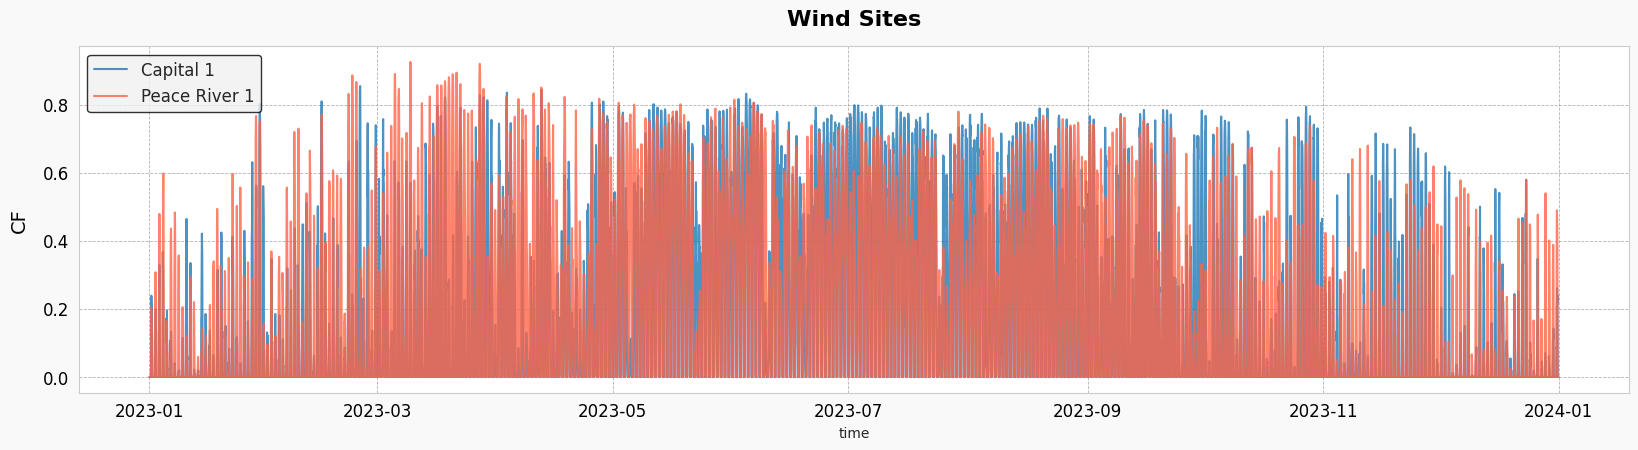

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")  

# Create figure
fig, ax = plt.subplots(figsize=(20, 4.5), facecolor="#f9f9f9")  # Light background

# Define custom colors
colors = ['#1f77b4', '#ff6347']

# Plot using Seaborn
sns.lineplot(data=timeseries_clusters_wind, x=timeseries_clusters_wind.index, y='Capital_1', ax=ax, color=colors[0], linewidth=1.5, alpha=0.8, label="Capital 1")
sns.lineplot(data=timeseries_clusters_wind, x=timeseries_clusters_wind.index, y='PeaceRiver_1', ax=ax, color=colors[1], linewidth=1.5, alpha=0.8, label="Peace River 1")

# Enhance aesthetics
ax.set_facecolor("#ffffff")  # Pure white plot area
ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.6, color="gray")

# Labels & title
ax.set_title("Wind Sites", fontsize=16, color="black", fontweight="bold", pad=15)
# ax.set_xlabel("Time", fontsize=14, color="black", labelpad=10)
ax.set_ylabel("CF", fontsize=14, color="black", labelpad=10)

# Customize ticks
ax.tick_params(axis='x', colors="black", labelsize=12)
ax.tick_params(axis='y', colors="black", labelsize=12)

# Add a legend
ax.legend(facecolor="#f0f0f0", edgecolor="black", fontsize=12, loc="upper left", frameon=True)

# Show plot
plt.show()


# Static Data Visuals in Interactive Maps

In [ ]:
"""
import hvplot.pandas
import holoviews as hv
from holoviews import opts
from bokeh.layouts import gridplot
from bokeh.io import show

# Initialize Holoviews extension
hv.extension('bokeh')


# Define a dictionary to map columns to specific colormaps
cmap_mapping = {
    'lcoe_wind': 'cool',
    'potential_capacity_wind': 'Blues',
    'lcoe_solar': 'autumn',
    'CF_IEC2': 'RdYlGn',
    'wind_CF_mean': 'RdYlGn',
    'windspeed_ERA5': 'winter',
    'nearest_station_distance_km': 'Oranges',
    'potential_capacity_wind': 'Blues',
    'potential_capacity_solar': 'Oranges',
}

# Define a function to create individual plots
def create_plot(column_name, cmap):
    return cells.hvplot(
        color=column_name,
        cmap=cmap,
        geo=True,
        tiles='CartoDark',  # Default base map
        frame_width=300,  # Adjust the size of the plots
        frame_height=300,  # Adjust the size of the plots
        data_aspect=.5,
        alpha=0.8,
        line_color='None',
        line_width=0.1,
        hover_line_color='red'
    ).opts(title=column_name,
            show_grid=True,
            show_legend=True,
            tools=['hover', 'pan', 'wheel_zoom','reset','box_select'],
            legend_position='top_right'
        )

# Create a list of plots for each column
plots = [create_plot(col, cmap) for col, cmap in cmap_mapping.items()]

# Create a grid layout for the plots
grid = hv.Layout(plots).cols(3)  # Adjust the number of columns as needed

# Show the layout
hv.save(grid, '../docs/grid_plots.html')  # Save the grid layout as an HTML file



# Render the layout as a Bokeh object
bokeh_layout = hv.render(grid, backend='bokeh')

# Show the layout
show(bokeh_layout)
"""

"\nimport hvplot.pandas\nimport holoviews as hv\nfrom holoviews import opts\nfrom bokeh.layouts import gridplot\nfrom bokeh.io import show\n\n# Initialize Holoviews extension\nhv.extension('bokeh')\n\n\n# Define a dictionary to map columns to specific colormaps\ncmap_mapping = {\n    'lcoe_wind': 'cool',\n    'potential_capacity_wind': 'Blues',\n    'lcoe_solar': 'autumn',\n    'CF_IEC2': 'RdYlGn',\n    'wind_CF_mean': 'RdYlGn',\n    'windspeed_ERA5': 'winter',\n    'nearest_station_distance_km': 'Oranges',\n    'potential_capacity_wind': 'Blues',\n    'potential_capacity_solar': 'Oranges',\n}\n\n# Define a function to create individual plots\ndef create_plot(column_name, cmap):\n    return cells.hvplot(\n        color=column_name,\n        cmap=cmap,\n        geo=True,\n        tiles='CartoDark',  # Default base map\n        frame_width=300,  # Adjust the size of the plots\n        frame_height=300,  # Adjust the size of the plots\n        data_aspect=.5,\n        alpha=0.8,\n        

# Timeseries Plots

In [ ]:
# import pandas as pd
# import hvplot.pandas
# import panel as pn
# import random

# # Initialize Panel with the dark theme
# pn.extension(theme='default')

# # Load your DataFrames
# df_solar = timeseries_clusters_solar  # Your solar DataFrame
# df_wind = timeseries_clusters_wind    # Your wind DataFrame

# # Create a list of the column names for the dropdowns
# solar_options = df_solar.columns.tolist()
# wind_options = df_wind.columns.tolist()

# # Function to generate a random vibrant color
# def get_random_vibrant_color():
#     return "#{:02x}{:02x}{:02x}".format(random.randint(150, 255), random.randint(150, 255), random.randint(150, 255))


# # Create a function to update the solar plot based on the selected time series
# def update_solar_plot(selected_series):
#     return df_solar[selected_series].hvplot.line(
#         title=f"Time Series - Solar: {selected_series}",
#         xlabel="DateTime",
#         ylabel="Value",
#         legend='top_left',
#         width=1000,  # Width of the plot
#         height=200,  # Height of the plot
#         tools=['hover'],  # Enable hover tool
#         line_color=get_random_vibrant_color()  # Random vibrant color for the solar plot
#     )

# # Create a function to update the wind plot based on the selected time series
# def update_wind_plot(selected_series):
#     return df_wind[selected_series].hvplot.line(
#         title=f"Time Series - Wind: {selected_series}",
#         xlabel="DateTime",
#         ylabel="Value",
#         legend='top_left',
#         width=1000,  # Width of the plot
#         height=200,  # Height of the plot
#         tools=['hover'],  # Enable hover tool
#         line_color=get_random_vibrant_color()  # Random vibrant color for the wind plot
#     )

# # Create dropdown widgets for selecting the time series
# solar_dropdown = pn.widgets.Select(name='Select Solar Time Series', options=solar_options)
# wind_dropdown = pn.widgets.Select(name='Select Wind Time Series', options=wind_options)

# # Create dynamic panels that update the plot based on the dropdown selections
# dynamic_solar_plot = pn.bind(update_solar_plot, selected_series=solar_dropdown)
# dynamic_wind_plot = pn.bind(update_wind_plot, selected_series=wind_dropdown)

# # Create a layout with the dropdowns and the plots in a two-row grid
# grid_layout = pn.Column(
#     solar_dropdown, dynamic_solar_plot,  # Solar plot in the first row
#     wind_dropdown, dynamic_wind_plot     # Wind plot in the second row
# )

# # Save the grid layout as an HTML file
# grid_layout.save('../docs/time_series_plots.html')

# # Display the panel in a notebook or in a web application
# grid_layout.show()

In [ ]:
clusters_solar.loc['CowichanValley_1']

geometry                       MULTIPOLYGON (((-123.6345 48.5618, -123.6455 4...
lcoe                                                                   56.124705
capex                                                                   1.366598
fom                                                                          0.0
vom                                                                       0.0238
CF_mean                                                                 0.195585
Cluster_No                                                                     1
potential_capacity                                                   1371.134333
Region                                                            CowichanValley
nearest_station                                                       BC_KSH_DSS
nearest_station_distance_km                                             4.443855
Rank                                                                          28
Operational_life            

In [ ]:
# import pandas as pd
# import hvplot.pandas
# import panel as pn
# import random

# # Initialize Panel with the dark theme
# pn.extension(theme='default')

# # Load your DataFrames
# df_solar = timeseries_clusters_solar  # Your solar DataFrame
# df_wind = timeseries_clusters_wind    # Your wind DataFrame
# clusters_solar = clusters_solar       # Your clusters_solar DataFrame

# # Create a list of the column names for the dropdowns
# solar_options = df_solar.columns.tolist()
# wind_options = df_wind.columns.tolist()

# # Function to generate a random vibrant color
# def get_random_vibrant_color():
#     return "#{:02x}{:02x}{:02x}".format(random.randint(150, 255), random.randint(150, 255), random.randint(150, 255))

# # Create a function to update the solar plot based on the selected time series
# def update_solar_plot(selected_series):
#     return df_solar[selected_series].hvplot.line(
#         title=f"Time Series - Solar: {selected_series}",
#         xlabel="DateTime",
#         ylabel="Value",
#         legend='top_left',
#         width=1000,  # Width of the plot
#         height=300,  # Increased height for better visibility
#         tools=['hover'],  # Enable hover tool
#         line_color=get_random_vibrant_color(),  # Random vibrant color for the solar plot
#         line_width=2,  # Make line thicker for better visibility
#         fontsize={'title': 16, 'xlabel': 14, 'ylabel': 14, 'legend': 12},  # Adjust font sizes
#     )

# # Create a function to update the wind plot based on the selected time series
# def update_wind_plot(selected_series):
#     return df_wind[selected_series].hvplot.line(
#         title=f"Time Series - Wind: {selected_series}",
#         xlabel="DateTime",
#         ylabel="Value",
#         legend='top_left',
#         width=1000,  # Width of the plot
#         height=300,  # Increased height for better visibility
#         tools=['hover'],  # Enable hover tool
#         line_color=get_random_vibrant_color(),  # Random vibrant color for the wind plot
#         line_width=2,  # Make line thicker for better visibility
#         fontsize={'title': 16, 'xlabel': 14, 'ylabel': 14, 'legend': 12},  # Adjust font sizes
#     )

# # Create dropdown widgets for selecting the time series
# solar_dropdown = pn.widgets.Select(name='Select Solar Time Series', options=solar_options, width=300)
# wind_dropdown = pn.widgets.Select(name='Select Wind Time Series', options=wind_options, width=300)


# # Create dynamic panels that update the plot based on the dropdown selections
# dynamic_solar_plot = pn.bind(update_solar_plot, selected_series=solar_dropdown)
# dynamic_wind_plot = pn.bind(update_wind_plot, selected_series=wind_dropdown)

# # Function to get relevant row data from clusters_solar
# def get_cluster_info(selected_series):
#     # Use the selected series name to find the relevant row in clusters_solar
#     selected_row = clusters_solar.loc[selected_series]
#     return selected_row

# # Create a function to update the table based on the selected time series
# def update_cluster_table(selected_series):
#     cluster_info = get_cluster_info(selected_series)
    
#     # Drop the geometry column if it exists
#     if 'geometry' in cluster_info.index:
#         cluster_info = cluster_info.drop('geometry')
    
#     # Return the DataFrame widget without the geometry column
#     return pn.widgets.DataFrame(cluster_info.to_frame().T, width=800, height=200)


# # Create dynamic panels for the table
# dynamic_cluster_table = pn.bind(update_cluster_table, selected_series=solar_dropdown)

# # Adjust the overall layout for better alignment and spacing
# grid_layout = pn.Column(
#     pn.Row(solar_dropdown, dynamic_solar_plot, align="center"),  # Center align solar dropdown and plot
#     pn.Row(dynamic_cluster_table),  # Show the table below the solar plot
#     pn.Row(wind_dropdown, dynamic_wind_plot, align="center"),    # Center align wind dropdown and plot
#     sizing_mode='stretch_width',  # Make layout responsive to different screen sizes
#     width=1100,  # Set a consistent width for the layout
#     height=900   # Adjust height to give more space for plots
# )

# # Save the grid layout as an HTML file
# grid_layout.save('../docs/time_series_plots_with_table.html')

# # Display the panel in a notebook or in a web application
# grid_layout.show()
